# Module 11 Challenge
## Deliverable 2: Scrape and Analyse Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

 Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
# first scrape teh html from the website
html = browser.html

In [5]:
# create a BeautifulSoup Obj to parse the html data
mars_soup = soup(html, 'html.parser')

In [6]:
# Extract all rows of data (this is assumed to mean table row data)
mars_data_rows = mars_soup.find_all('tr', class_='data-row')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [7]:
# Create an empty list
mars_table_data = []
# Loop through the scraped data to create a list of rows
for row in mars_data_rows:
    # extract list of td's from table row
    row_data = row.select('td')

    # create a temporary row data list
    temp_row_data = []

    # loop through row_data to and append to temp_row_data
    for td in row_data:
        # append data to temp list
        temp_row_data.append(td.text)
    
    # append temp_row_data list to mars_table_data
    mars_table_data.append(temp_row_data)


In [8]:
# The HTML table was extracted into a Pandas DataFrame. Either Pandas or Splinter and Beautiful Soup were used to scrape the data. The columns have the correct headings and data types. (15 points)
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_df = pd.DataFrame(mars_table_data, columns=['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'])

In [9]:
# Confirm DataFrame was created successfully
mars_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [10]:
# Examine data type of each column
mars_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [11]:
# Change data types for data analysis
mars_df = mars_df.astype({
    "id": object,
    "terrestrial_date": "datetime64[ns]",
    "sol": int,
    "ls": int,
    "month": int,
    "min_temp": float,
    "pressure": float
})

In [12]:
# Confirm type changes were successful by examining data types again
mars_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyse the Data

Analyse your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.

In [13]:
# 1. How many months exist on Mars? (5 points)
# make a new series of the month
# per EXAMPLE RESULT, count values and sort by index
mars_df['month'].value_counts().sort_index()

1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: month, dtype: int64

In [14]:
# 2. How many Martian days' worth of data are there? (5 points)
# return nunique from the sol column
mars_df['sol'].nunique()

1867

In [15]:
# 3. Which month, on average, has the lowest temperature? The highest? (10 points)
# groupby month and return avg of 'min_temp' using .agg('mean')
mars_mos_avg_low_temp = mars_df.groupby('month').min_temp.agg('mean')
mars_mos_avg_low_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

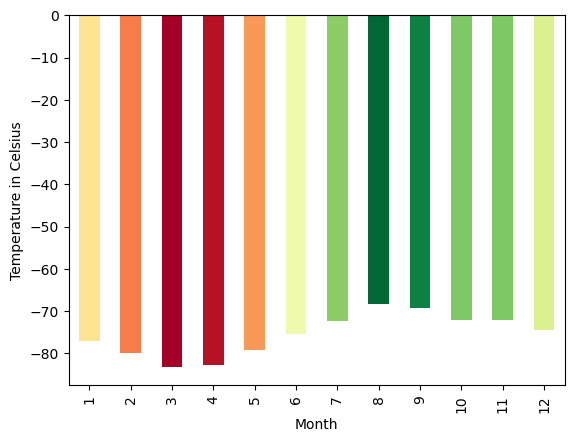

In [16]:
# Plot the average temperature by month
# Define the colors based on the temperature values
colors = plt.cm.RdYlGn((mars_mos_avg_low_temp - mars_mos_avg_low_temp.min()) / (mars_mos_avg_low_temp.max() - mars_mos_avg_low_temp.min()))

# Create the bar plot with custom colors
mars_mos_avg_low_temp.plot.bar(color=colors)
plt.xlabel('Month')
plt.ylabel('Temperature in Celsius')
plt.show()

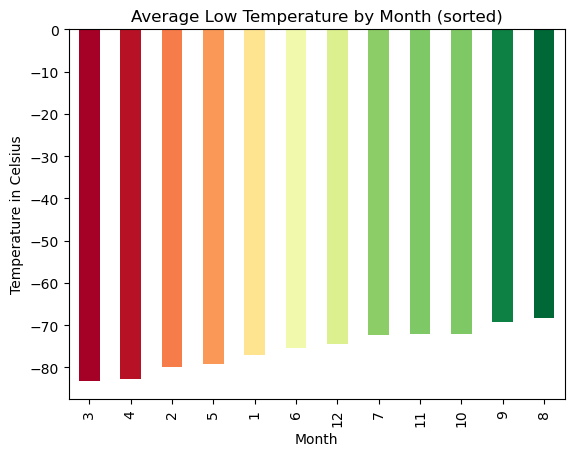

In [17]:
# Identify the coldest and hottest months in Curiosity's location
# group data and sort by min_temp

# Sort the DataFrame by minimum temperature to find coldest and hottest months
mars_mos_min_temp = mars_mos_avg_low_temp.sort_values()

# Define the colors based on the sorted minimum temperature values
colors_sorted = plt.cm.RdYlGn((mars_mos_min_temp - mars_mos_min_temp.min()) / (mars_mos_min_temp.max() - mars_mos_min_temp.min()))

# Create the bar plot with custom colors for the sorted data
mars_mos_min_temp.plot.bar(color=colors_sorted)
plt.xlabel('Month')
plt.ylabel('Temperature in Celsius')
plt.title('Average Low Temperature by Month (sorted)')
plt.show()

In [18]:
# 4. Which month, on average, has the lowest atmospheric pressure? The highest? (10 points)
mars_mos_avg_pressure = mars_df.groupby('month').pressure.agg('mean')
mars_mos_avg_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

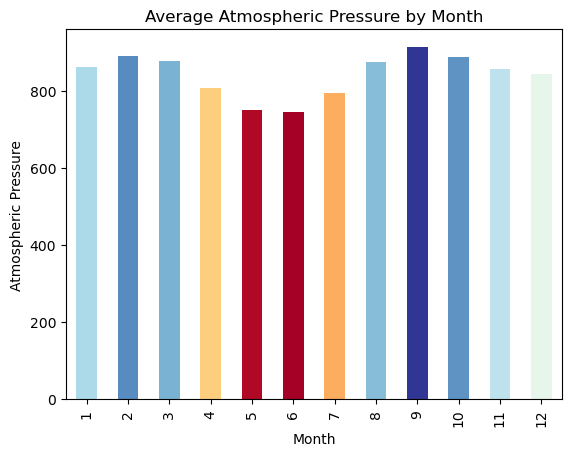

In [19]:
# Plot the average pressure by month
# Define the colors based on the pressure values using RdYlBu colormap
colors = plt.cm.RdYlBu((mars_mos_avg_pressure - mars_mos_avg_pressure.min()) / (mars_mos_avg_pressure.max() - mars_mos_avg_pressure.min()))

# Create the bar plot with custom colors
mars_mos_avg_pressure.plot.bar(color=colors)
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')
plt.title('Average Atmospheric Pressure by Month')
plt.show()

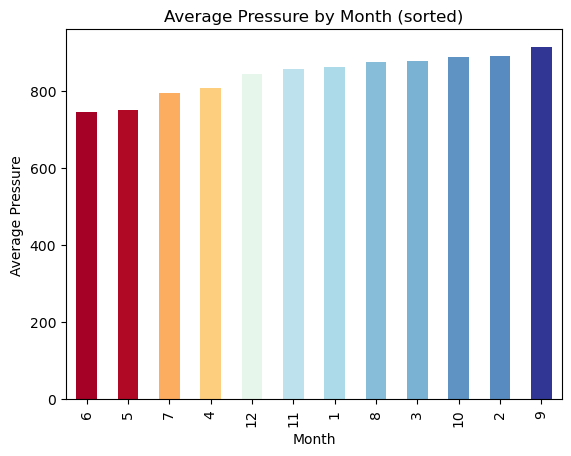

In [20]:
# Sort the DataFrame by average pressure
mars_mos_pressure = mars_mos_avg_pressure.sort_values()

# Define the colors based on the sorted average pressure values using RdYlBu colormap
colors = plt.cm.RdYlBu((mars_mos_pressure - mars_mos_pressure.min()) / (mars_mos_pressure.max() - mars_mos_pressure.min()))

# Create the bar plot with custom colors
mars_mos_pressure.plot.bar(color=colors)
plt.xlabel('Month')
plt.ylabel('Average Pressure')
plt.title('Average Pressure by Month (sorted)')
plt.show()

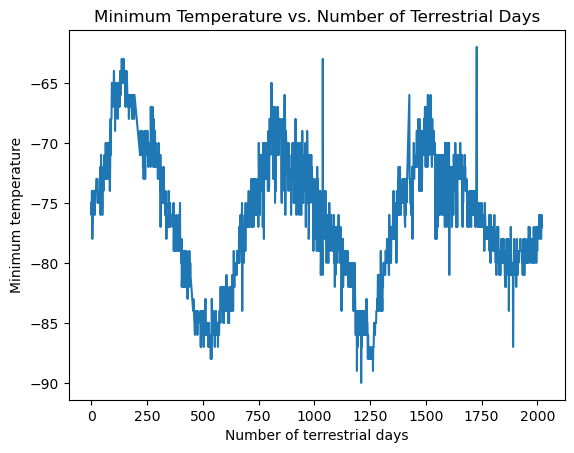

In [21]:
# 5. How many terrestrial days exist in a Martian year? A visual estimate within 25% was made. (10 points)

# create a new column which calculates the number of earth days from first record to current record
# Find the first recorded Earth date
first_terra_day = mars_df['terrestrial_date'].min()

# Create a new DataFrame with minimum temperatures from each record and the calculated number of Earth days
terra_days_min_temps_df = pd.DataFrame({
    "min_temp": mars_df['min_temp'],
    "terra_days": (mars_df['terrestrial_date'] - first_terra_day).dt.days
})

# Plot the integer value of Earth days versus the minimum temperatures for each sol record
plt.plot(terra_days_min_temps_df["terra_days"], terra_days_min_temps_df["min_temp"])
plt.xlabel("Number of terrestrial days")
plt.ylabel("Minimum temperature")
plt.title("Minimum Temperature vs. Number of Terrestrial Days")
plt.show()

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [22]:
# The DataFrame was exported into a CSV file. (5 points)
mars_df.to_csv('mars_weather_data.csv', header=True, index=False, date_format='%Y-%m-%d')

In [23]:
browser.quit()